In [1]:
#2장에서 만든 모델이 어떤 가중치를 학습했는지 확인하기 위해 checkpoint 파일을 읽어온다.
from tensorflow import keras
model = keras.models.load_model("best-cnn-model.h5")

In [2]:
#model의 layer들은 layers에 저장되어있다.
model.layers

In [4]:
# model의 가중치와 절편은 weights 속성에 저장되어있다.
#첫번째층의 필터 크기는 3x3이고, 1차원, 32개로 지정되었다.
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [5]:
#weights속성을 numpy() 배열로 변환하고, 가중치의 평균과 표준편차를 계산해본다.
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.033111233 0.26981717


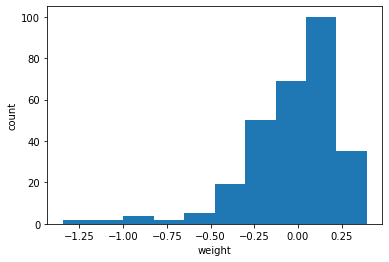

In [18]:
#가중치의 분포를 히스토그램으로 그려본다.
#1차원 배열을 전달하기 위해 reshape를 사용한다.
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

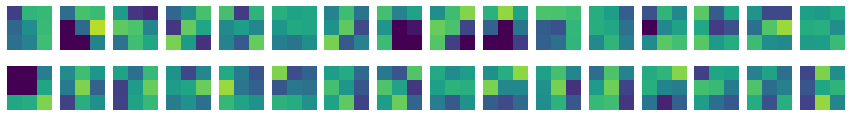

In [13]:
#32개의 필터를 16개씩 두줄에 출력해본다.
#imshow 함수는 배열에 있는 최댓값과, 최솟값을 사용해 픽셀의 강도를 표현한다. 
#imshow는 어떤 값이든지 배열의 최대값이라면 가장밝으면 노란색으로 그린다.
#vmin과 vmax로 colormap으로 표현할 범위를 지정했다.
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [14]:
#훈련하지 않은 빈 합성곱 신경망 만들기.
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                         'relu', padding='same', input_shape=(28,28,1)))

In [15]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [16]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.00032030584 0.08443332


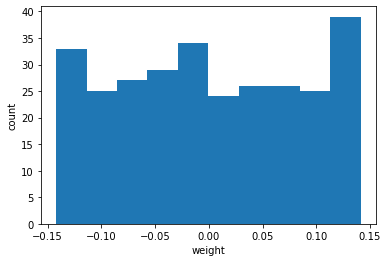

In [21]:
#tensorflow가 신경망의 가중치를 처음 초기화할때 균등분포에서 랜덤하게 값을 선택하기 때문에 이러한 히스토그램이 나온다.
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

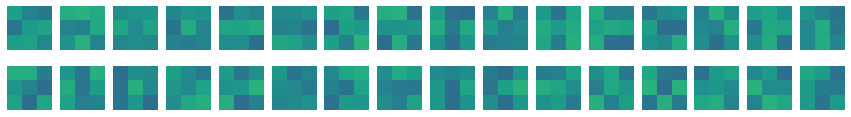

In [22]:
fig, axs = plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16+j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

## 함수형 API

In [25]:
#dense layer 2개로 이루어진 신경망을 함수형 API로 구현하기.
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [30]:
inputs = keras.Input(shape=(784,))
hidden = dense1(inputs)
outputs = dense2(hidden)
keras.Model(inputs, outputs)


In [32]:
#conv_acti의 predict() 메서드를 호출하면 첫번째 Conv2D의 출력을 예측할 수 있다.
conv_acti = keras.Model(model.input, model.layers[0].output)

## feature map 시각화.

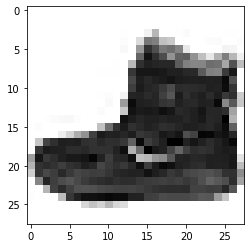

In [33]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [34]:
#위의 그림 샘플을 conv_acti모델에 입력하여 feature map 출력해보기,
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv_acti.predict(inputs)

In [35]:
print(feature_maps.shape)

(1, 28, 28, 32)


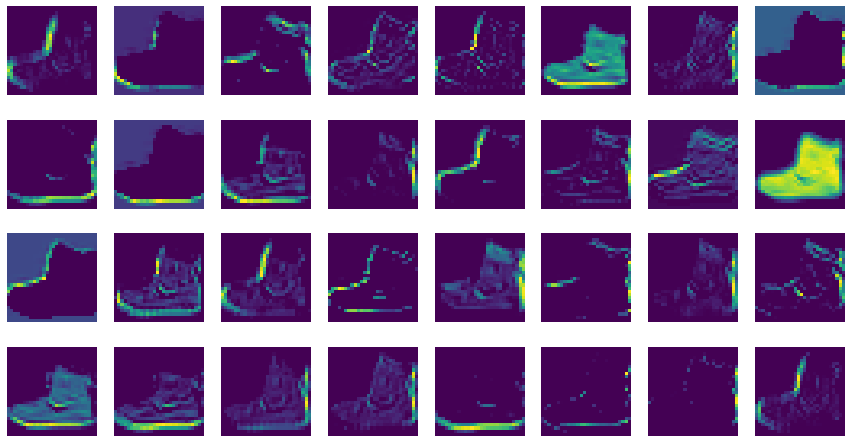

In [37]:
fig, axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()

In [38]:
#합성곱 층 모델.
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [39]:
inputs = train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps = conv2_acti.predict(inputs)

In [40]:
print(feature_maps.shape)

(1, 14, 14, 64)


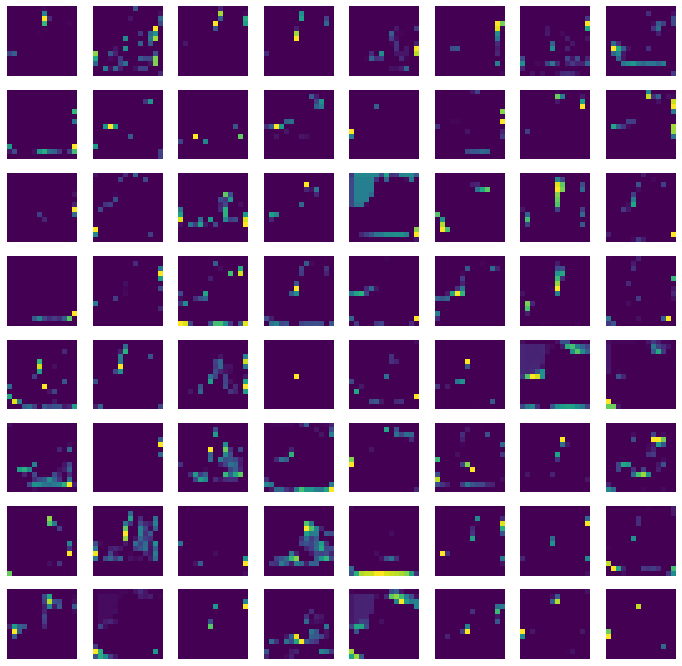

In [41]:
fig, axs = plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i, j].axis('off')
plt.show()